## Pradeep Mundlik
### Assignment-1
#### Problem-2

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Creating Dataset from two gaussian distros

d1 = torch.normal(1.0, 1.0, size=[500, 2])
d2 = torch.normal(7.0, 1.0, size=[500, 2])


In [3]:
X = torch.empty([1000, 3])
X[::2, :2] = d1
X[1::2, :2] = d2
X[:, 2] = 1


In [4]:
# Creating labels
Y = torch.empty(1000, 1)
Y[::2] = 1
Y[1::2] = 0


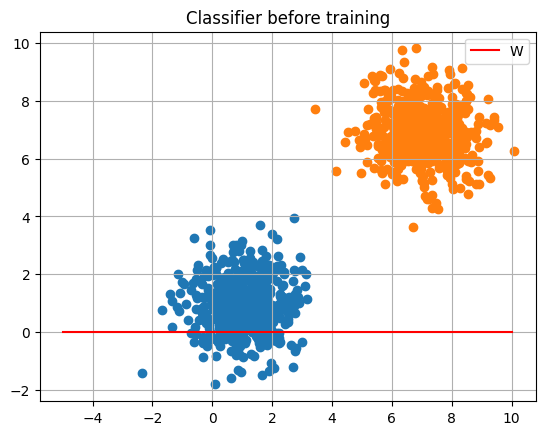

In [5]:
plt.scatter(X[::2, 0], X[::2, 1])
plt.scatter(X[1::2, 0], X[1::2, 1])
plt.plot(np.linspace(-5, 10, 100), np.zeros(100), 'r', label='W')
plt.title("Classifier before training")
plt.legend()
plt.grid()


Loss funtion used here is log loss.
* $$L = -y_t*log(y_p) - (1-y_t)*log(1-y_p) $$
* $$y_p = \frac{1}{1+\exp(-w^Tx)} $$
* $$ L = -y_t*log\left(\frac{1}{1+\exp(-w^Tx)}\right) - (1-y_t)*log\left(\frac{\exp{-w^Tx}}{1+\exp(-w^Tx)}\right) $$
* $$\nabla L = x*(y_p-y_t)$$

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


def logloss(y_t, y_p):
    return -1*y_t*(np.log(y_p)) - (1-y_t)*(np.log(1-y_p))


def gradient(x, y_t, y_p):
    return x*(y_p-y_t)


In [7]:
def SGD(X, Y):
    eta = 0.01
    epsilon = 0.001
    max_iter = 5000  # Maximum number of iterations allowed
    iter = 0  # number of iterations
    W = torch.zeros(X.size(1))  # initializing weight

    while (iter < max_iter):
        iter = iter+1
        loss = 0.0
        grad = 0.0
        for i in range(X.size(0)):
            y_p = sigmoid(X[i].dot(W))
            loss += logloss(Y[i], y_p)
            grad += gradient(X[i], Y[i], y_p)

        loss = loss/X.size(0)
        grad = grad/X.size(0)

        # print(grad)
        if (iter % 500 == 0):
            print(f'Average loss at end of iteration {iter} is {loss.item()}')
        if (loss.item() <= epsilon):
            print(f'Converged at iteration {iter} and loss {loss.item()}')
            break
        W = W - eta*grad

    return W


In [8]:
W = SGD(X, Y)


Average loss at end of iteration 500 is 0.29074862599372864
Average loss at end of iteration 1000 is 0.19689954817295074
Average loss at end of iteration 1500 is 0.14691951870918274
Average loss at end of iteration 2000 is 0.11671528220176697
Average loss at end of iteration 2500 is 0.09672089666128159
Average loss at end of iteration 3000 is 0.08258464187383652
Average loss at end of iteration 3500 is 0.0720900222659111
Average loss at end of iteration 4000 is 0.06400160491466522
Average loss at end of iteration 4500 is 0.0575820691883564
Average loss at end of iteration 5000 is 0.05236486345529556


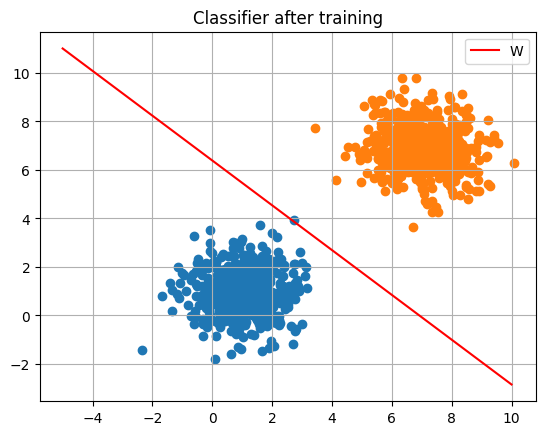

In [9]:
# plot after training
x = np.linspace(-5.0, 10.0, 100)
slope = -W[0].item()/W[1].item()
c = -W[2].item()/W[1].item()
y = slope*x + c
plt.plot(x, y, 'r', label='W')
plt.scatter(X[::2, 0], X[::2, 1])
plt.scatter(X[1::2, 0], X[1::2, 1])
plt.title("Classifier after training")
plt.legend()
plt.grid()
